## Лабораторная работа №1 Оценка влияния параметров дискретизации на точность передачи изображения


**Цель**

Оценить влияния параметров дискретизации на точность передачи
изображения с помощью показателей качества изображений.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image
from skimage import transform
import pandas as pd 
import warnings
from skimage.metrics import structural_similarity as SSIM
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import peak_signal_noise_ratio as PSNR

In [40]:
width = 15 # mm
resolution = 6000 #px
period = round((width/ resolution), 4) #период дискретизации
fs = round(1/period, 1) #частота дискретизации
print(fs)


400.0


In [41]:
def sin(x, frequency, phase = 0):
    return 0.5 + 0.5*np.sin(frequency * x + phase)

In [46]:
def get_mat(p):
    image = np.full((len(p), len(p)), fill_value=p)
    return image*255

In [47]:
# Дискритизация сигнала по чистоте
def _discretization(step, freq):
    y = []
    x = 0.0
    step =1/step
    while x < 10:
        y0 = integrate.quad(lambda x_ : sin(x, freq, 0), x, x+step)[0]
        y.append(round(y0,2))
        x += step
        
    return get_mat(y)

In [57]:
h= 9
steps = [h, h/2, h/4, h/8, h/16 ]

In [65]:
def resize(image, size):
    return transform.resize(image,size,mode='edge',anti_aliasing=False,
                               anti_aliasing_sigma=None,
                               preserve_range=True,
                               order=0)

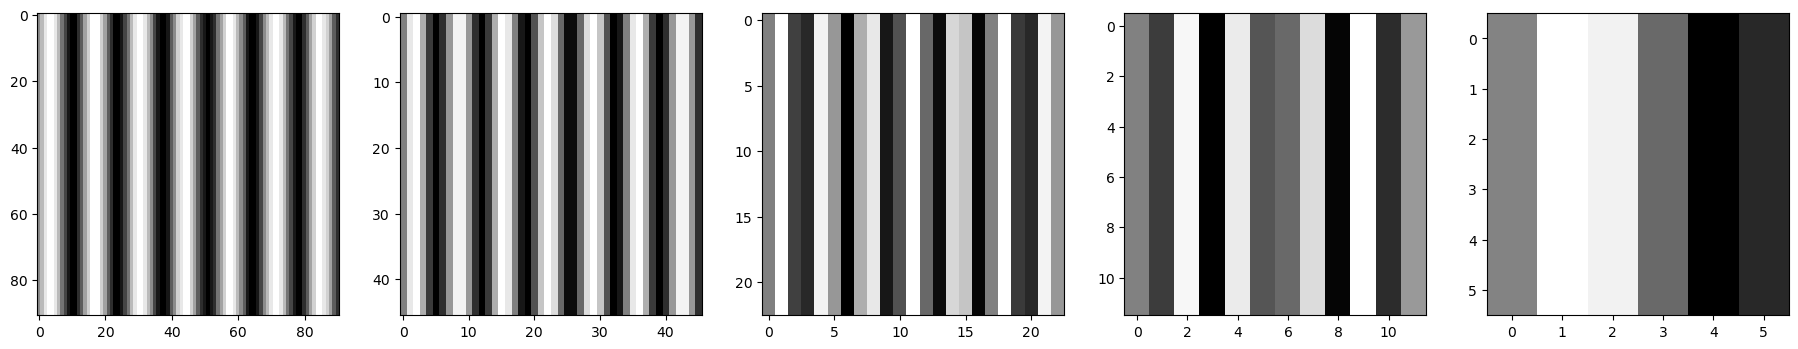

In [66]:
f  = plt.figure(figsize=(60,60))
images_sig = []
for i, step in enumerate(steps):
    image_sig = _discretization(step, fs)
    images_sig.append(image_sig)
    f.add_subplot(1,13, i+1)
    plt.imshow(image_sig, cmap = 'gray')

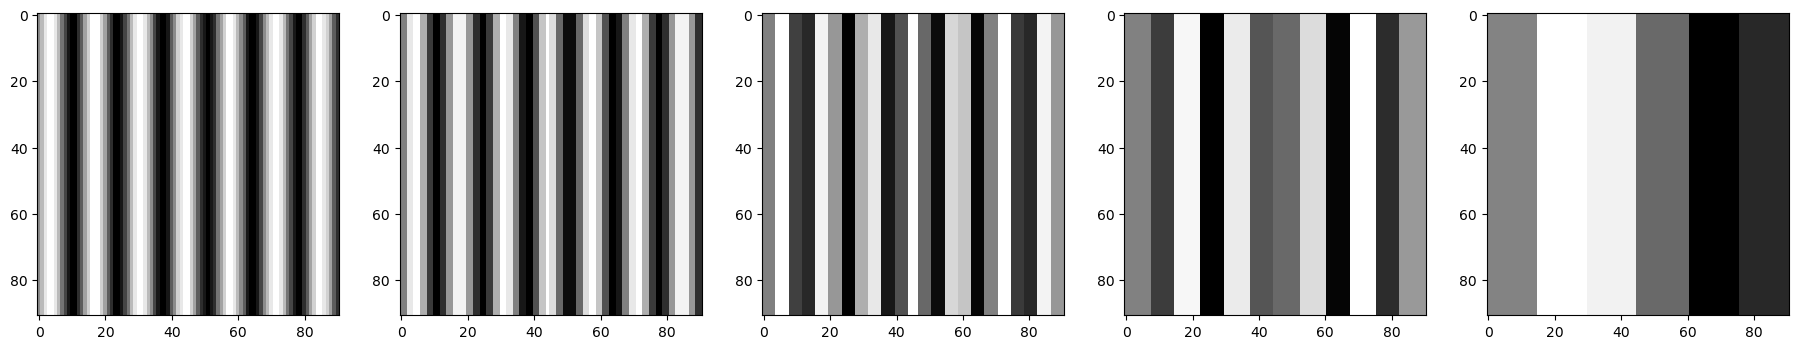

In [68]:
f  = plt.figure(figsize=(60,60))
size = images_sig[0].shape
resize_images =[resize(image, size) for image in images_sig] 
for i, image in enumerate(resize_images):
    f.add_subplot(1,13, i+1)
    plt.imshow(image, cmap = 'gray')

In [97]:
def get_state(resize_images):
    MSE_ = ['MSE']
    PSNR_ = ['PSNR']
    SSIM_ = ['SSIM']

    for image in resize_images:
        MSE_.append(round(MSE(resize_images[0], image), 2))
        PSNR_.append(round(PSNR(resize_images[0], image, data_range=255), 2))
        SSIM_.append(round(SSIM(resize_images[0], image, data_range=255),2))
    df = pd.DataFrame(({'func':[], 'img_1': [], 'img_2': [], 'img_3': [],'img_4': [], 'img_5': []}))
    df.loc[ len(df.index )] = MSE_
    df.loc[ len(df.index )] = PSNR_
    df.loc[ len(df.index )] = SSIM_
  
    print(df)
    for i in range(3):
        p = df.iloc[i].to_list()
        plt.title(p[0])
        plt.plot(np.arange(len(p[1:])), p[1:])
        plt.show()
    

   func  img_1   img_2    img_3     img_4     img_5
0   MSE    0.0  313.98  2898.26  15487.74  67004.40
1  PSNR    inf   23.16    13.51      6.23     -0.13
2  SSIM    1.0    0.62     0.17      0.08      0.08


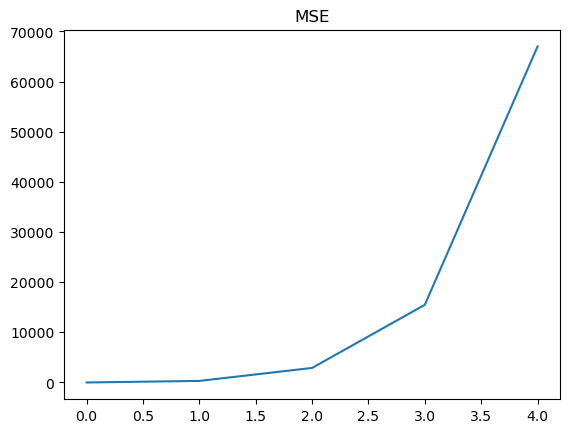

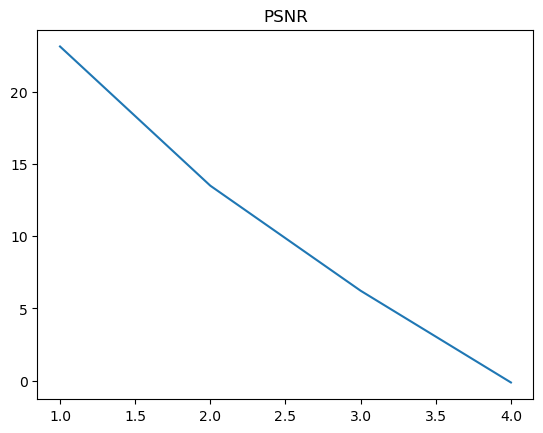

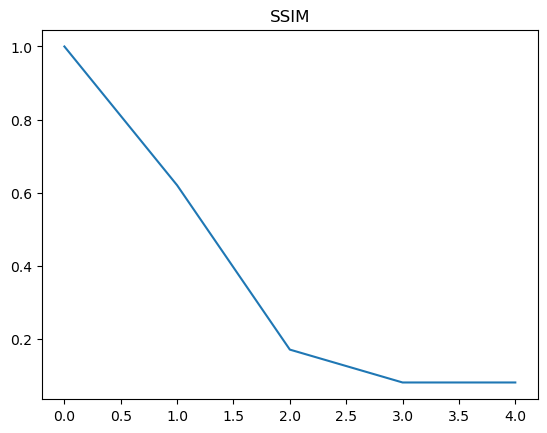

In [99]:
warnings.filterwarnings("ignore")
get_state(resize_images)

## Вывод

В результате выполнения лабораторной работы было оценено влияние параметров дискритизации на точность передачи изображения с помощью метрик качества изоражений. Проанализировав метрики качества можно сделать вывод, что чем больше частота дискретизации, тем точнее передается сигнал

